# random notebook to interactively explore issues

In [1]:
# Point Python to the path where we have installed the bad and darc packages
import sys
sys.path.insert(0, '/Users/btvincent/git-local/darc-experiments-python')

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import seaborn as sns

import darc
from darc.delayed.models import Hyperbolic as HyperbolicDelay
from darc.risky.models import Hyperbolic as HyperbolicRisk
#from darc.designs import BayesianAdaptiveDesignGeneratorDARC
from darc.delayed.designs import DuGreenMyerson2002 as DuGreenMyerson2002_delay
from darc.risky.designs import DuGreenMyerson2002 as DuGreenMyerson2002_risk

from darc.data_plotting import data_plotter
from darc.parameter_recovery import simulated_experiment_trial_loop

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
%config InlineBackend.figure_format = 'retina'

## do things...

In [3]:
# design thing ============================================
design_thing = DuGreenMyerson2002_delay()

# model ===================================================
true_params = pd.DataFrame.from_dict({'logk': [np.log(1/(365*5))], 'α': [2]})
model_delay = HyperbolicDelay(n_particles=5000)
model_delay.θ_true = true_params

In [4]:
fitted_model, summary_stats = simulated_experiment_trial_loop(
    design_thing, model_delay, track_this_parameter=None)

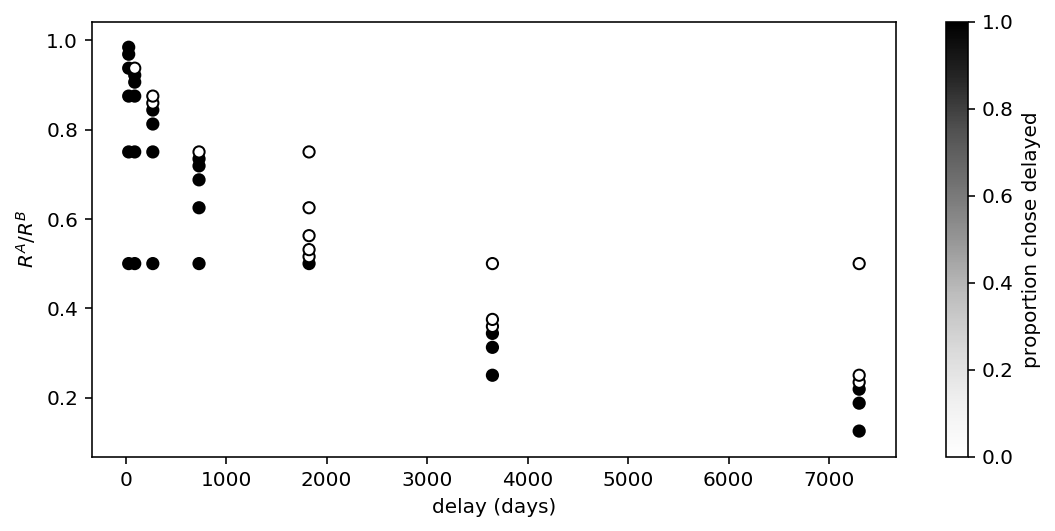

In [5]:
data_plotter(design_thing.get_df())

In [6]:
del true_params

In [7]:
# design thing ============================================
design_thing = DuGreenMyerson2002_risk()

# model ===================================================
true_params = pd.DataFrame.from_dict({'logh': [2], 'α': [2]})
model_risk = HyperbolicRisk(n_particles=5000)
model_risk.θ_true = true_params

In [8]:
fitted_model, summary_stats = simulated_experiment_trial_loop(
    design_thing, model_risk, track_this_parameter=None)

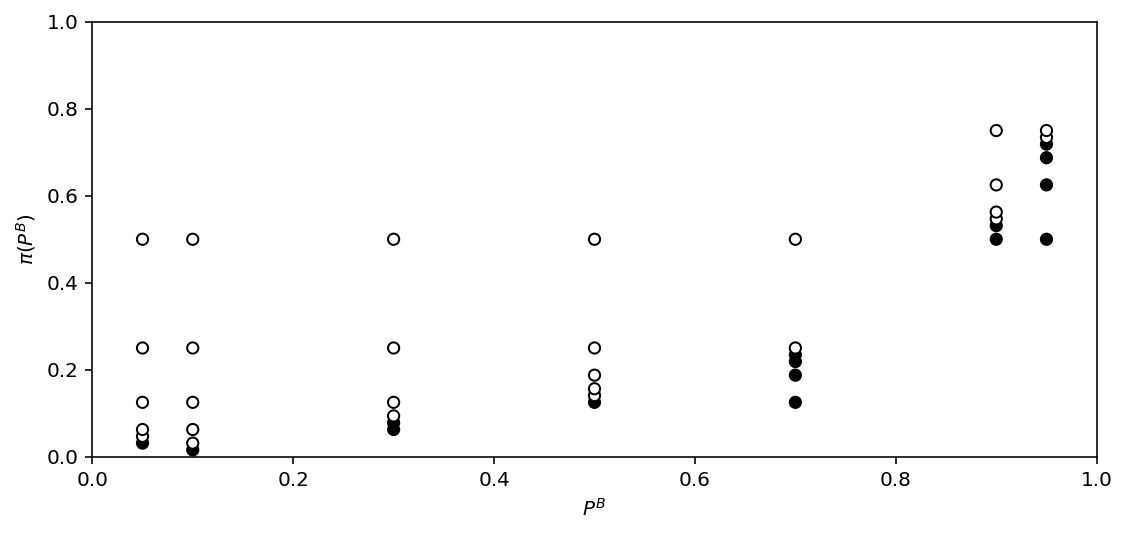

In [9]:
data_plotter(design_thing.get_df())

# Test front-end delays

In [10]:
from darc.designs import BayesianAdaptiveDesignGeneratorDARC, DesignSpaceBuilder

In [11]:
D = DesignSpaceBuilder.frontend_delay().build()
design_thing = BayesianAdaptiveDesignGeneratorDARC(D, max_trials=40, allow_repeats=True)

In [12]:
# model ===================================================
true_params = pd.DataFrame.from_dict({'logk': [np.log(1/(365*1))], 'α': [2]})
model_delay = HyperbolicDelay(n_particles=5000)
model_delay.θ_true = true_params

In [13]:
fitted_model, summary_stats = simulated_experiment_trial_loop(
    design_thing, model_delay, track_this_parameter=None)

plot_delay_with_front_end_delays


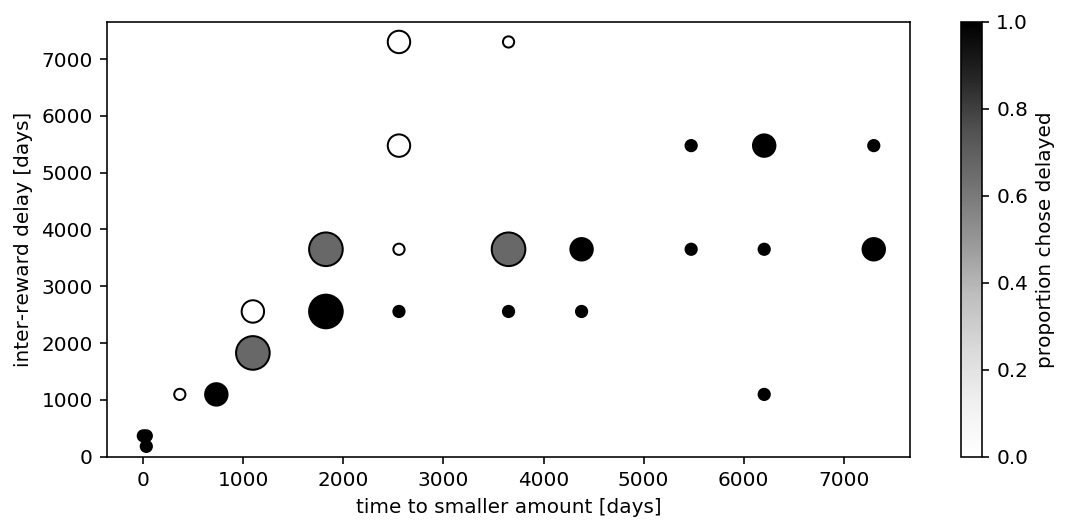

In [14]:
data_plotter(design_thing.get_df())